<a href="https://colab.research.google.com/github/nickstone1911/data-analysis-practice/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matplotlib Practice Exercises
Complete these exercises to help you learn how to use the `matplotlib` library to generate charts using python

Links to data files. Download and save to your working directory:
>- [ORNG.csv](https://drive.google.com/file/d/1z_ZKq7uQjkWD-R6h_5so8t6QscV4-11i/view?usp=sharing)
>- [USIX.csv](https://drive.google.com/file/d/1ctZbLPot7qXwcVEVLxp2C1mCS1Tq2DGE/view?usp=sharing)


# Notebook Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
mydir = '/content/drive/MyDrive/BAIM4205'
os.chdir(mydir)
os.getcwd()

'/content/drive/MyDrive/BAIM4205'

# Stock Analysis Dataset
In this exercise we will analyze how a stock has performed vs an overall market index. The `USIX.csv` contains data for an index and the `ORNG.csv` file contains data for a particular stock
>- Read in the `USIX.csv` and the `ORNG.csv` files to DataFrames, named `usindex` and `stock` respectively
>>- Set the index to "Date" for each DataFrame
>>- Only select the "Date" and "AdjustedClose" columns for this exercise. Check out the `usecols=` parameter when reading in your files to only read in a few columns from a file.

>- Examine the dataset

In [ ]:
stock = pd.read_csv('ORNG.csv', usecols=['Date','AdjustedClose'], index_col='Date')
stock.head()

,AdjustedClose
Date,
2017-01-03,54.595
2017-01-04,54.534
2017-01-05,54.812
2017-01-06,55.423
2017-01-09,55.930


In [ ]:
usindex = pd.read_csv('USIX.csv', usecols=['Date','AdjustedClose'], index_col='Date')
usindex.head()

,AdjustedClose
Date,
2017-01-03,412.295
2017-01-04,414.748
2017-01-05,414.418
2017-01-06,415.901
2017-01-09,414.528


# Data Preparation
Combine the index and stock data
>- Combine the index and stock data into one DataFrame using `join()`. Name the combined dataframe stockdf
>- Set your `lsuffix` and `rsuffix` to "_idx" for the index data and "_stock" for the stock data

In [ ]:
stockdf = stock.join(usindex, lsuffix='_stock', rsuffix='_idx').reset_index()
stockdf.head()

,Date,AdjustedClose_stock,AdjustedClose_idx
0,2017-01-03,54.595,412.295
1,2017-01-04,54.534,414.748
2,2017-01-05,54.812,414.418
3,2017-01-06,55.423,415.901
4,2017-01-09,55.930,414.528


Rename Your Columns
>- For the index column: "index_price"
>- For the stock column: "stock_price

In [ ]:
stockdf.rename(columns={"AdjustedClose_stock": "stock_price", "AdjustedClose_idx": "index_price"}, inplace=True)
stockdf.head()

,Date,stock_price,index_price
0,2017-01-03,54.595,412.295
1,2017-01-04,54.534,414.748
2,2017-01-05,54.812,414.418
3,2017-01-06,55.423,415.901
4,2017-01-09,55.930,414.528


# Q1: Create a Line Plot for `index_price`
>- Repliclate the chart given in the link below to show how the stock price compares to the index price
>>- [Q1 Chart](https://drive.google.com/file/d/1ViILi8z0Vqr-VQv-M8gTQTaEyTdlmQ2Y/view?usp=sharing)
>- Set the width of the figure to 15
>- For all other settings refer to the chart in the link below. Your task is to replicate this chart.



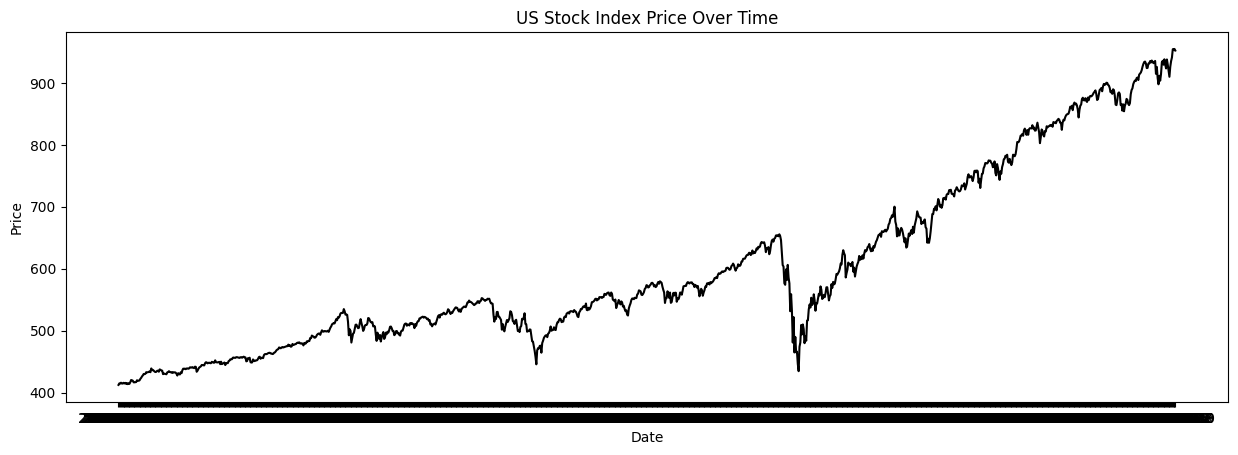

In [ ]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
ax.plot(stockdf['Date'], stockdf["index_price"], color='black')
ax.set_title('US Stock Index Price Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

fig.show()

# Q2: Plot the index price versus the stock price
>- Repliclate the chart given in the link below to show how the stock price compares to the index price
>>- [Q2 Chart](https://drive.google.com/file/d/1-0QvNBYg2E6opHxaQ-gJPrlh-GIsKlPB/view?usp=sharing)
>- The figure width is 15
>- Notice we are going to fix the issue with the Q1 chart not displaying any dates. It's actually displaying dates but because there are so many they are all overlapping.
>>- We will use the `matplotlib.dates` library to help us set our x-axis to only display major axis points by years. We do this using `YearLocator()`. Below is the code you will need to run as part of your code to build the chart.

```python
import matplotlib.dates as mdates
years = mdates.YearLocator()
ax.xaxis.set_major_locator(years) # this has to come after you define your ax object
```


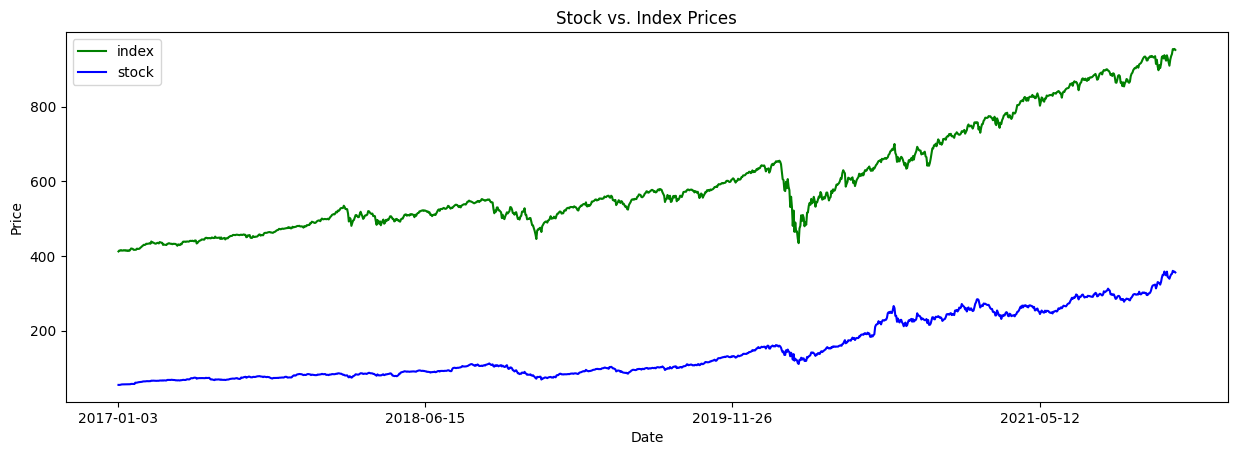

In [ ]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
fig.set_figwidth(15)
ax.plot(stockdf['Date'], stockdf["index_price"], color='green')
ax.plot(stockdf['Date'], stockdf["stock_price"], color='blue')
ax.set_title('Stock vs. Index Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(['index', 'stock'])
years = mdates.YearLocator()
ax.xaxis.set_major_locator(years)
fig.show()

### Q2b: If you want to try and get months to show up on the x-axis try that in the next code cell.

>- Here's a chart to try and replicate: [Q2b Chart](https://drive.google.com/file/d/1qQYrI8tLEu4nz3fc_lJ86sgS68LREcSp/view?usp=sharing)

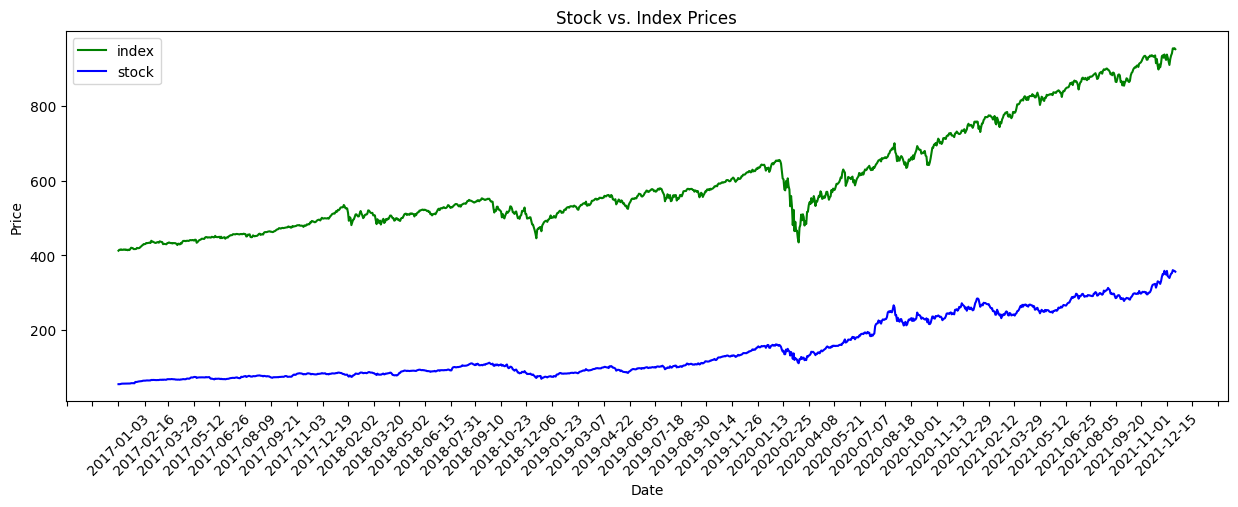

In [ ]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
ax.plot(stockdf['Date'], stockdf["index_price"], color='green')
ax.plot(stockdf['Date'], stockdf["stock_price"], color='blue')
ax.set_title('Stock vs. Index Prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend(['index', 'stock'])
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(months)
plt.xticks(rotation=45)
fig.show()

# Q3: Plot the index price versus the stock price
The chart in Q2 wasn't the greatest to compare our stock data to the index because the prices have different ranges of values. In this exercise we learn to plot using a secondary y-axis. This will allow us to more easily see how the two prices compare over time.

>- Repliclate the chart given in the link below to show how the stock price compares to the index price
>>- [Q3 Chart](https://drive.google.com/file/d/1-4-An0tkm1c7H6aiG-R1yB9S8V_vbaN6/view?usp=sharing)
>- The figure width is 15
>- The figure uses two axes and a secondary y-axis allowing us to see how the stock and index compare more easily
>>- To set up dual y-axis create two axes objects one of which is defined as `ax2 = ax1.twinx()`. See [twinx() doc](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html) for more information on dual axis plotting in matplotlib.
>>- This source should help with this problem as well: [Dual Y axis with Python and Matplotlib](https://www.python-graph-gallery.com/line-chart-dual-y-axis-with-matplotlib)

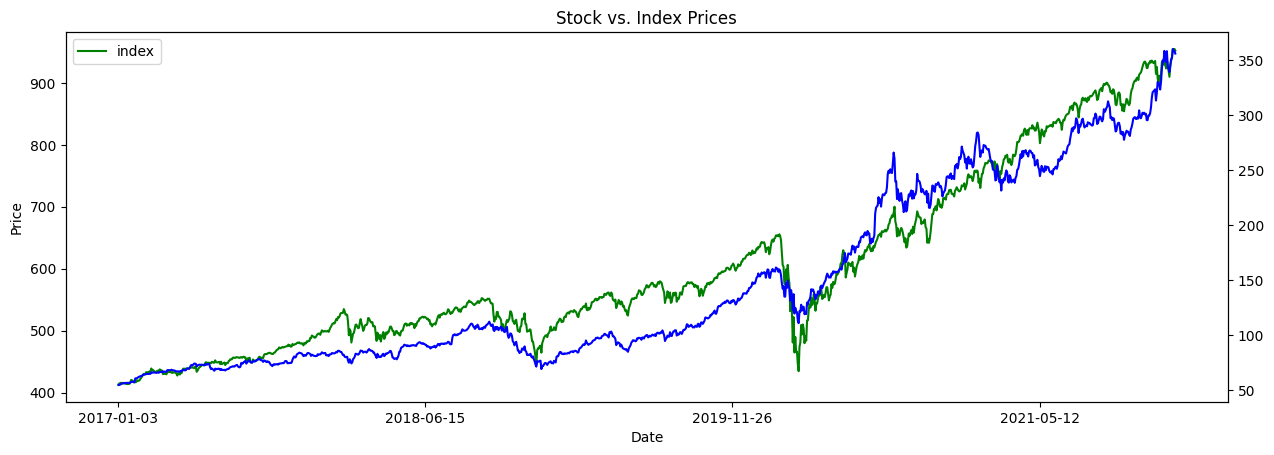

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
fig.set_figwidth(15)
ax1.plot(stockdf['Date'], stockdf["index_price"], color='green')
ax2.plot(stockdf['Date'], stockdf["stock_price"], color='blue')
ax1.set_title('Stock vs. Index Prices')
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.legend(['index', 'stock'])
years = mdates.YearLocator()
ax1.xaxis.set_major_locator(years)
fig.show()